# Obesity Levels and Predictions based on eating habits and Physcial Condition 

# Abstract- Summary
The dataset estimation on obesity levels based on eating habits and physical condition is data acquired from Peru, Columbia, and Mexico.The questions we want to answer are there attributes that we can measure that directly impact obesity levels in individuals? This study will examine the consumption patterns and physical condition of individuals from three different countries to predict the onset of obesity. This project will break the indivduals featured in this into groups, if a indivdual is likely to be catogrized with other people classified as obese than they could possibly change certain aspects in their routine.

# 

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
obesity = pd.read_csv("/Users/amalgamation/Downloads/ObesityDataSet_raw_and_data_sinthetic (2)/ObesityDataSet_raw_and_data_sinthetic.csv",encoding='utf-8')
obesity.head(2112)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Business and ML Problem

This project will break the indivduals featured in this into groups, if a indivdual is likely to be catogrized with other people classified as obese than they could possibly change certain aspects in their routine. Possible stakeholders could be government officials trying to have a healther population. My task as a data scientist is to break the indivduals featured in this dataset into clusters and observe the features of the clusters with the most obese people. 

# Data Dictionary

The dataset includes basic physcial features like height, weight in kgs, and age. Followed by family features like family history with  family members being overweight. The rest of the dataset is about the intake of the person like (FAVC) whether or not they have high caloric foods reguraly, (FCVC) which is whether or not you eat vegatables wit hyour meals, (NCP) how many meals are had daily, (CAEC) do they eat in between meals, (Smoke) do thye smoke. (CH2O) do they drink water daily, (SCC) calories daily tracked, (FAF) physical activity, (TUE) how much technologies is used everyday, (CALC) how frequently do you drink alcohol. (MTrans) what is the regular form of transportation, and (Nobeyesdad) which is the catorgization under the Body Mass Index.The data was collected from the 
According to Barquera from The Lancet, obesity has become a leading public health concern in
Mexcio. Obesity levels have been on the rise for the past 30+ years, with 25% or less of the adult
population having a weight that falls in the healthy BMI range (Barquera 2020). In Peru, according to
a study by Emma C Preston et al, childhood obesity begins within the 7-8 age group, with
prevalences between 19% and 8% (Preston et al 2015). Lastly, obesity prevalence in Columbia is
vastly increasing in urban residents. A study done aimed to assess changes in obesity levels in
Columbian adults between 2005 – 2010 showed that average BMI increased by 3%. Multivariable
analyses indicated various attributes such as sex, age, wealth etc have a positive affect on obesity
levels (Kasper et al, 2014). 

# Understanding and Visualizing Data

In [3]:
obesity.isnull()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


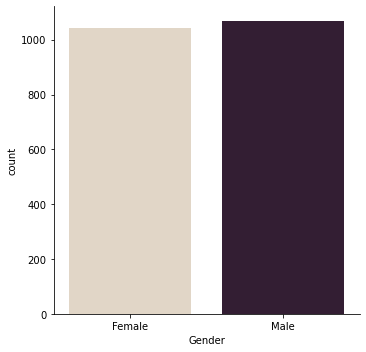

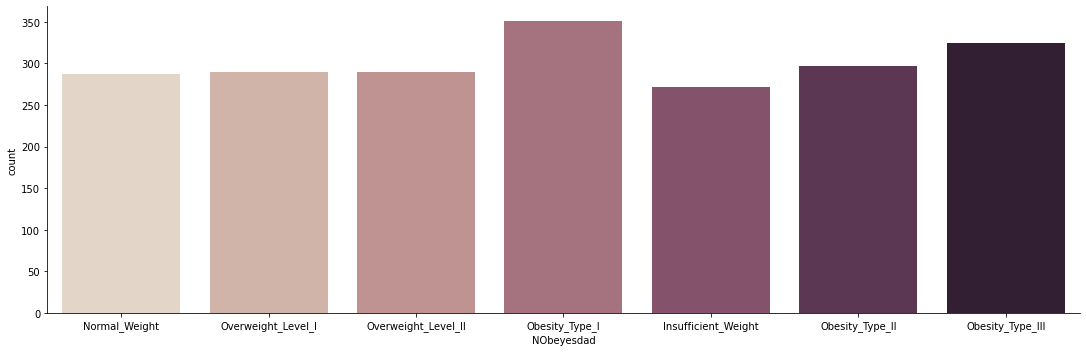

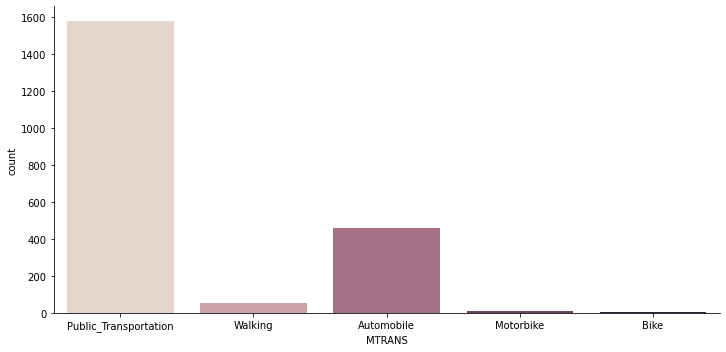

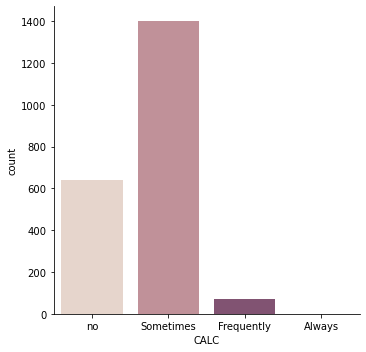

In [12]:
sns.catplot(x="Gender", kind="count", palette="ch:.25", data=obesity)
sns.catplot(x="NObeyesdad", kind="count", palette="ch:.20", data=obesity,aspect=3)

sns.catplot(x="MTRANS",kind="count", palette="ch:.10", data=obesity,aspect=2)
sns.catplot(x="CALC",kind="count", palette="ch:.10", data=obesity)

From these plots, we can see the amount of entries or people who have specfic features. Gender is practically equal with male looking slightly higher. There is a good distrubution of the BMI catergorizations which is good for the clusters later on in this report. The group with the biggest group when it comes to the BMI catergorziations is Obesity Type 1. Most of the participants in the study are 

# Data Preperation

# Modeling

# Model Evaluations and Selection 

# Conclusions

# Limitations